In [1]:
import pandas as pd

# Paths to your dataset files
path_2wayEpi = '2-wayEpi_100feat.txt'
path_2Additive_2wayEpi = '2Additive_2-wayEpi_100feat.txt'
path_4wayAdditive = '4-wayAdditive_100feat.txt'
path_4wayHeterogeneous = '4-wayHeterogeneous_100feat.txt'

# Load datasets
df_2wayEpi = pd.read_csv(path_2wayEpi, sep="\t")
df_2Additive_2wayEpi = pd.read_csv(path_2Additive_2wayEpi, sep="\t")
df_4wayAdditive = pd.read_csv(path_4wayAdditive, sep="\t")
df_4wayHeterogeneous = pd.read_csv(path_4wayHeterogeneous, sep="\t")

# Basic exploration
print(df_2wayEpi.describe())
print(df_2Additive_2wayEpi.describe())
print(df_4wayAdditive.describe())
print(df_4wayHeterogeneous.describe())


                N0           N1           N2          N3           N4  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean      0.349000     0.731000     0.101000     0.87300     0.843000   
std       0.538041     0.664139     0.308049     0.71511     0.691975   
min       0.000000     0.000000     0.000000     0.00000     0.000000   
25%       0.000000     0.000000     0.000000     0.00000     0.000000   
50%       0.000000     1.000000     0.000000     1.00000     1.000000   
75%       1.000000     1.000000     0.000000     1.00000     1.000000   
max       2.000000     2.000000     2.000000     2.00000     2.000000   

                N5           N6           N7          N8           N9  ...  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000  ...   
mean      0.907000     0.419000     0.633000     0.18500     0.715000  ...   
std       0.706293     0.594805     0.659353     0.41827     0.684283  ...   
min       0.000000     0.00000

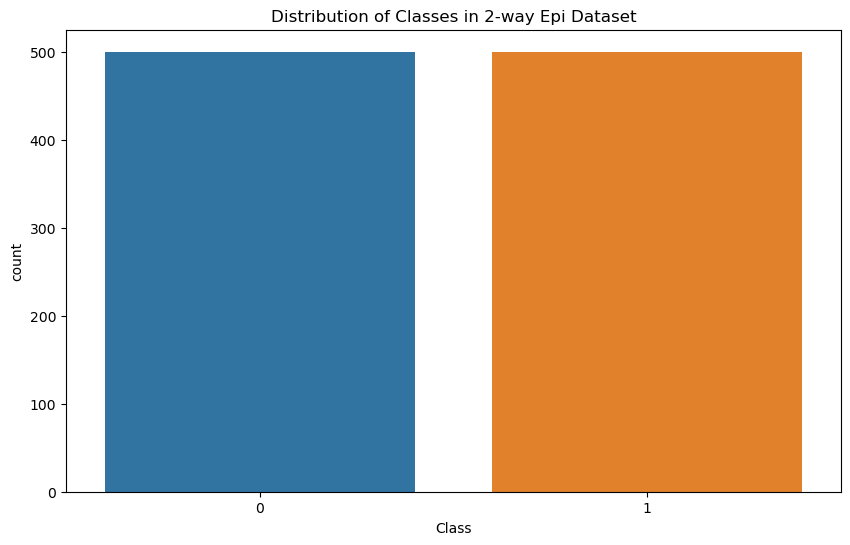

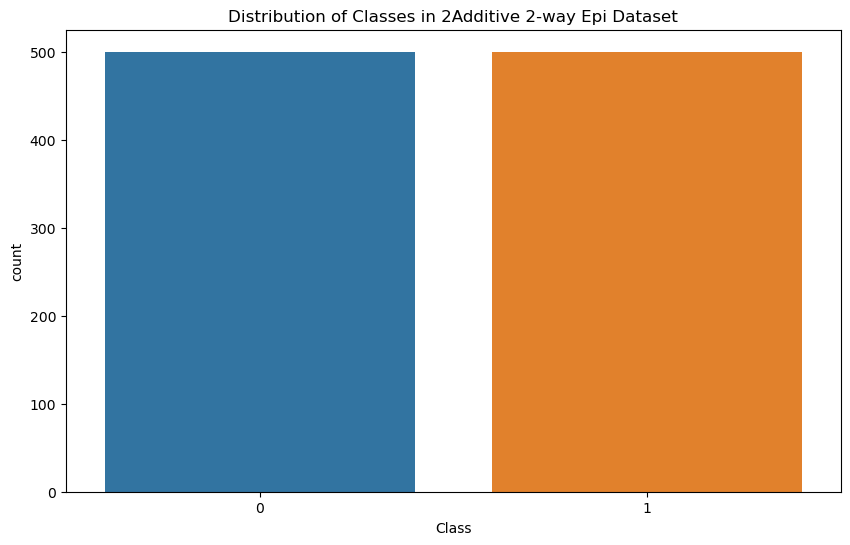

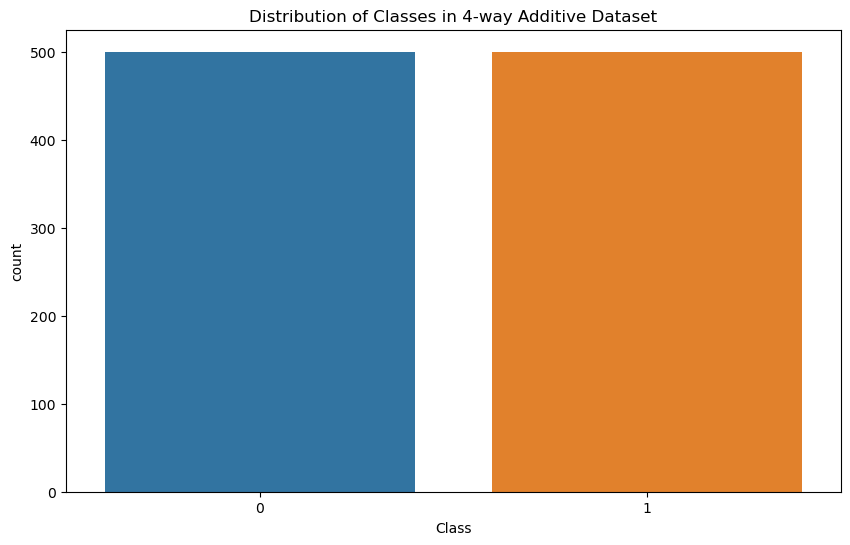

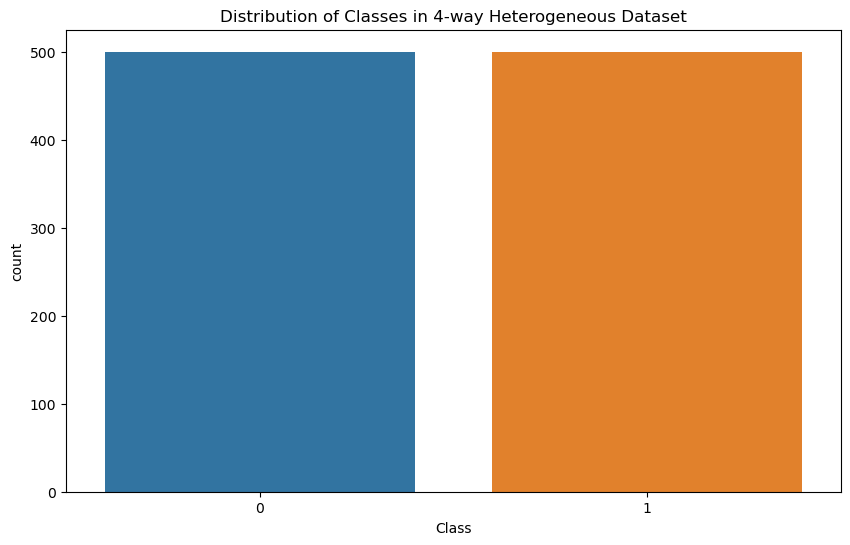

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Class', data=df)
    plt.title(title)
    plt.show()

plot_data(df_2wayEpi, 'Distribution of Classes in 2-way Epi Dataset')
plot_data(df_2Additive_2wayEpi, 'Distribution of Classes in 2Additive 2-way Epi Dataset')
plot_data(df_4wayAdditive, 'Distribution of Classes in 4-way Additive Dataset')
plot_data(df_4wayHeterogeneous, 'Distribution of Classes in 4-way Heterogeneous Dataset')


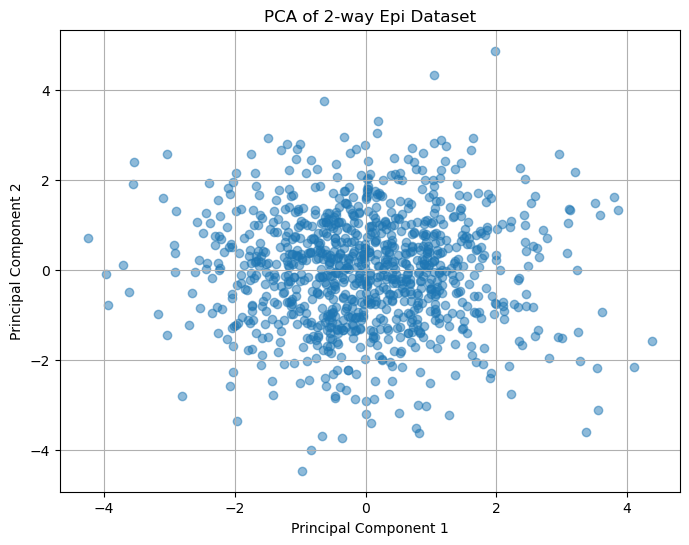

Explained variance by component: [0.01656227 0.01612831]


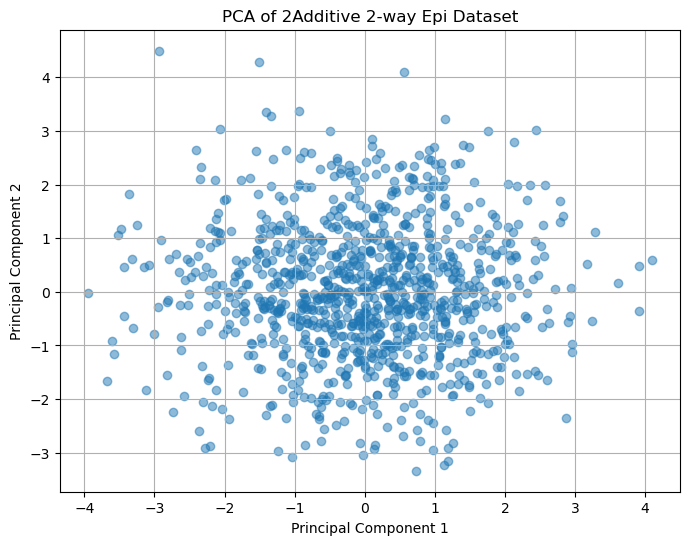

Explained variance by component: [0.01725361 0.01596884]


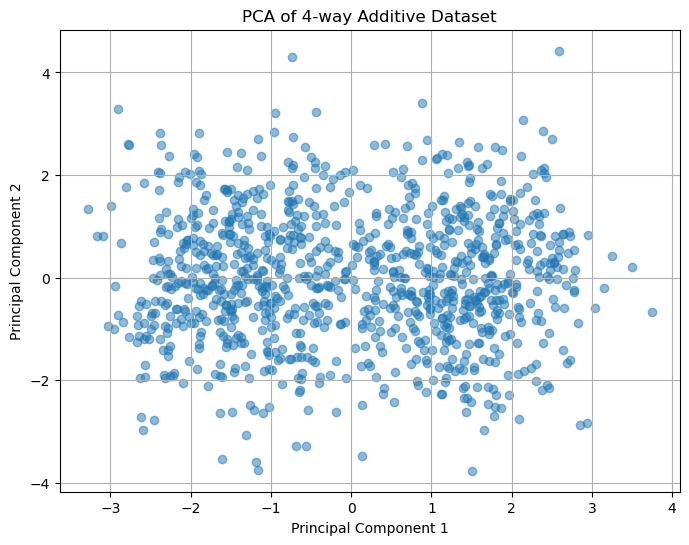

Explained variance by component: [0.02470269 0.01643617]


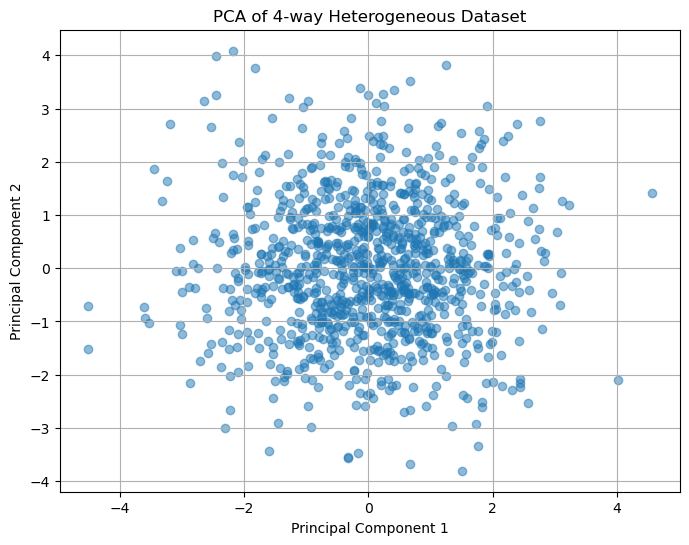

Explained variance by component: [0.01662948 0.01658199]


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to load and standardize the dataset
def load_and_standardize(path):
    df = pd.read_csv(path, sep="\t")
    features = df.drop('Class', axis=1)
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    return features_scaled, df['Class']

# Function to perform PCA and plot the results
def perform_pca(features_scaled, title):
    pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
    principal_components = pca.fit_transform(features_scaled)
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    plt.figure(figsize=(8, 6))
    plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of {title}')
    plt.grid(True)
    plt.show()

    print(f"Explained variance by component: {pca.explained_variance_ratio_}")

# Paths to your dataset files
path_2wayEpi = '2-wayEpi_100feat.txt'
path_2Additive_2wayEpi = '2Additive_2-wayEpi_100feat.txt'
path_4wayAdditive = '4-wayAdditive_100feat.txt'
path_4wayHeterogeneous = '4-wayHeterogeneous_100feat.txt'

# Loading and standardizing datasets
features_scaled_2wayEpi, class_2wayEpi = load_and_standardize(path_2wayEpi)
features_scaled_2Additive_2wayEpi, class_2Additive_2wayEpi = load_and_standardize(path_2Additive_2wayEpi)
features_scaled_4wayAdditive, class_4wayAdditive = load_and_standardize(path_4wayAdditive)
features_scaled_4wayHeterogeneous, class_4wayHeterogeneous = load_and_standardize(path_4wayHeterogeneous)

# Performing PCA
perform_pca(features_scaled_2wayEpi, '2-way Epi Dataset')
perform_pca(features_scaled_2Additive_2wayEpi, '2Additive 2-way Epi Dataset')
perform_pca(features_scaled_4wayAdditive, '4-way Additive Dataset')
perform_pca(features_scaled_4wayHeterogeneous, '4-way Heterogeneous Dataset')


In [4]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Function to apply SelectKBest to each dataset and retrieve selected feature indices
def select_features_anova(X, y, num_features=20):  # Increase num_features if needed
    selector = SelectKBest(score_func=f_classif, k=num_features)
    selector.fit_transform(X, y)
    return selector.get_support(indices=True)

# Load and standardize datasets (assuming previous functions are defined and used here)
features_scaled_2wayEpi, class_2wayEpi = load_and_standardize(path_2wayEpi)
features_scaled_2Additive_2wayEpi, class_2Additive_2wayEpi = load_and_standardize(path_2Additive_2wayEpi)
features_scaled_4wayAdditive, class_4wayAdditive = load_and_standardize(path_4wayAdditive)
features_scaled_4wayHeterogeneous, class_4wayHeterogeneous = load_and_standardize(path_4wayHeterogeneous)

# Select features from each dataset
selected_2wayEpi = select_features_anova(features_scaled_2wayEpi, class_2wayEpi)
selected_2Additive_2wayEpi = select_features_anova(features_scaled_2Additive_2wayEpi, class_2Additive_2wayEpi)
selected_4wayAdditive = select_features_anova(features_scaled_4wayAdditive, class_4wayAdditive)
selected_4wayHeterogeneous = select_features_anova(features_scaled_4wayHeterogeneous, class_4wayHeterogeneous)

# Find intersection of selected features across all datasets
common_selected_features = set(selected_2wayEpi)
common_selected_features.intersection_update(selected_2Additive_2wayEpi, selected_4wayAdditive, selected_4wayHeterogeneous)

# Print common features
print("Common selected features indices across all datasets:", common_selected_features)

# Optionally, extract these features for further analysis or model training
common_features_data = features_scaled_2wayEpi[:, list(common_selected_features)]  # Example for one dataset


Common selected features indices across all datasets: set()


In [5]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Function to load and standardize the dataset
def load_and_standardize(path):
    df = pd.read_csv(path, sep="\t")
    X = df.drop('Class', axis=1)
    y = df['Class']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return pd.DataFrame(X_scaled, columns=X.columns), y

# Function for ANOVA F-test to select top features
def select_features_anova(X, y, num_features=10):
    selector = SelectKBest(score_func=f_classif, k=num_features)
    X_selected = selector.fit_transform(X, y)
    return X_selected, selector.get_support(indices=True)

# Function for Recursive Feature Elimination (RFE) with Random Forest
def select_features_rfe(X, y, num_features=10):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    rfe = RFE(estimator=model, n_features_to_select=num_features, step=1)
    X_rfe = rfe.fit_transform(X, y)
    return X_rfe, rfe.get_support(indices=True)

# Applying feature selection and printing selected feature names
def feature_selection_and_print(X, y, dataset_name):
    # ANOVA F-test
    X_selected_anova, indices_anova = select_features_anova(X, y, num_features=10)
    print(f"{dataset_name} - ANOVA Selected indices:", indices_anova)
    print(f"{dataset_name} - ANOVA Selected feature names:", X.columns[indices_anova].tolist())

    # RFE with Random Forest
    X_selected_rfe, indices_rfe = select_features_rfe(X, y, num_features=10)
    print(f"{dataset_name} - RFE Selected indices:", indices_rfe)
    print(f"{dataset_name} - RFE Selected feature names:", X.columns[indices_rfe].tolist())

# Paths to your datasets
path_2wayEpi = '2-wayEpi_100feat.txt'
path_2Additive_2wayEpi = '2Additive_2-wayEpi_100feat.txt'
path_4wayAdditive = '4-wayAdditive_100feat.txt'
path_4wayHeterogeneous = '4-wayHeterogeneous_100feat.txt'

# Load, standardize, and apply feature selection for each dataset
datasets = {
    "2-way Epi": path_2wayEpi,
    "2Additive 2-way Epi": path_2Additive_2wayEpi,
    "4-way Additive": path_4wayAdditive,
    "4-way Heterogeneous": path_4wayHeterogeneous
}

for name, path in datasets.items():
    X, y = load_and_standardize(path)
    feature_selection_and_print(X, y, name)


2-way Epi - ANOVA Selected indices: [ 2  5 19 20 26 36 53 63 70 72]
2-way Epi - ANOVA Selected feature names: ['N2', 'N5', 'N19', 'N20', 'N26', 'N36', 'N53', 'N63', 'N70', 'N72']
2-way Epi - RFE Selected indices: [ 5 13 44 56 58 68 80 86 98 99]
2-way Epi - RFE Selected feature names: ['N5', 'N13', 'N44', 'N56', 'N58', 'N68', 'N80', 'N86', 'M0P1', 'M0P2']
2Additive 2-way Epi - ANOVA Selected indices: [13 38 44 71 72 73 85 87 94 99]
2Additive 2-way Epi - ANOVA Selected feature names: ['N13', 'N38', 'N44', 'N71', 'N72', 'N73', 'N85', 'N87', 'N94', 'M1P4']
2Additive 2-way Epi - RFE Selected indices: [ 7 19 26 45 74 81 96 97 98 99]
2Additive 2-way Epi - RFE Selected feature names: ['N7', 'N19', 'N26', 'N45', 'N74', 'N81', 'M0P1', 'M0P2', 'M1P3', 'M1P4']
4-way Additive - ANOVA Selected indices: [ 6 22 50 55 60 89 96 97 98 99]
4-way Additive - ANOVA Selected feature names: ['N6', 'N22', 'N50', 'N55', 'N60', 'N89', 'M0P1', 'M1P2', 'M2P3', 'M3P4']
4-way Additive - RFE Selected indices: [29 39 5

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Function to train and evaluate Random Forest and XGBoost models with multiple metrics
def train_and_evaluate(X, y, feature_indices, dataset_name):
    # Select the features based on indices obtained from feature selection
    X_selected = X.iloc[:, feature_indices]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Initialize models
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    # List to store models
    models = [('Random Forest', rf_model), ('XGBoost', xgb_model)]

    # Train and evaluate each model
    for model_name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        prec = precision_score(y_test, predictions)
        rec = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

        print(f"{dataset_name} - {model_name} Metrics:")
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"AUC-ROC: {auc:.4f}\n")

# Applying feature selection, training, and evaluating models for each dataset
def process_dataset(X, y, dataset_name):
    # ANOVA F-test feature selection
    _, indices_anova = select_features_anova(X, y, num_features=10)

    # Training and evaluating models using features selected by ANOVA F-test
    train_and_evaluate(X, y, indices_anova, dataset_name + " (ANOVA)")

# Paths and datasets are defined previously in the code snippet
for name, path in datasets.items():
    X, y = load_and_standardize(path)
    process_dataset(X, y, name)


2-way Epi (ANOVA) - Random Forest Metrics:
Accuracy: 0.4400
Precision: 0.4091
Recall: 0.3750
F1 Score: 0.3913
AUC-ROC: 0.4517

2-way Epi (ANOVA) - XGBoost Metrics:
Accuracy: 0.4500
Precision: 0.4314
Recall: 0.4583
F1 Score: 0.4444
AUC-ROC: 0.4429

2Additive 2-way Epi (ANOVA) - Random Forest Metrics:
Accuracy: 0.5300
Precision: 0.5100
Recall: 0.5312
F1 Score: 0.5204
AUC-ROC: 0.5529

2Additive 2-way Epi (ANOVA) - XGBoost Metrics:
Accuracy: 0.4500
Precision: 0.4300
Recall: 0.4479
F1 Score: 0.4388
AUC-ROC: 0.4954

4-way Additive (ANOVA) - Random Forest Metrics:
Accuracy: 0.9400
Precision: 0.9565
Recall: 0.9167
F1 Score: 0.9362
AUC-ROC: 0.9852

4-way Additive (ANOVA) - XGBoost Metrics:
Accuracy: 0.9550
Precision: 0.9780
Recall: 0.9271
F1 Score: 0.9519
AUC-ROC: 0.9895

4-way Heterogeneous (ANOVA) - Random Forest Metrics:
Accuracy: 0.6400
Precision: 0.6463
Recall: 0.5521
F1 Score: 0.5955
AUC-ROC: 0.6833

4-way Heterogeneous (ANOVA) - XGBoost Metrics:
Accuracy: 0.6200
Precision: 0.6220
Recall:

Processing 2-way Epi...


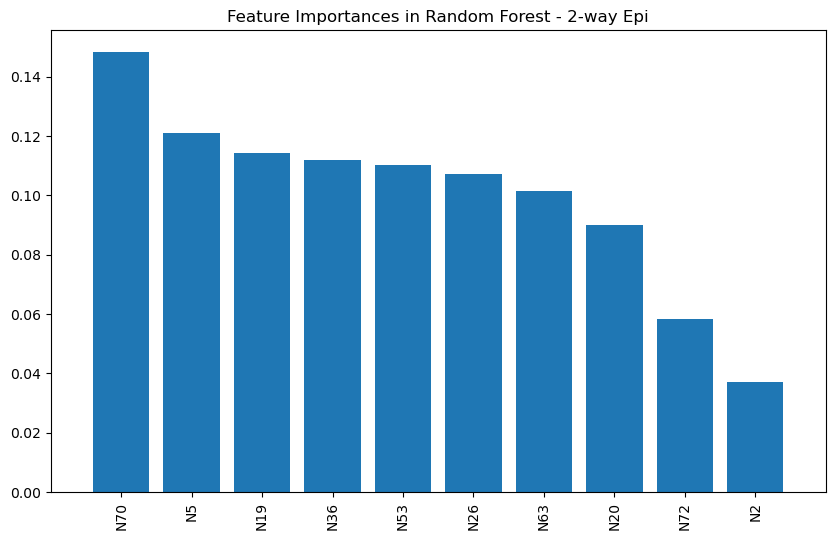

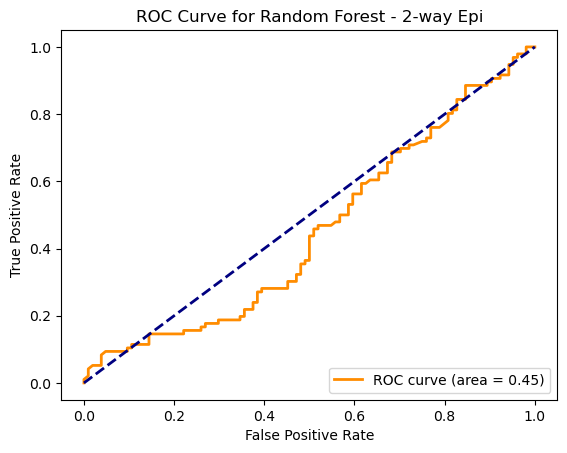

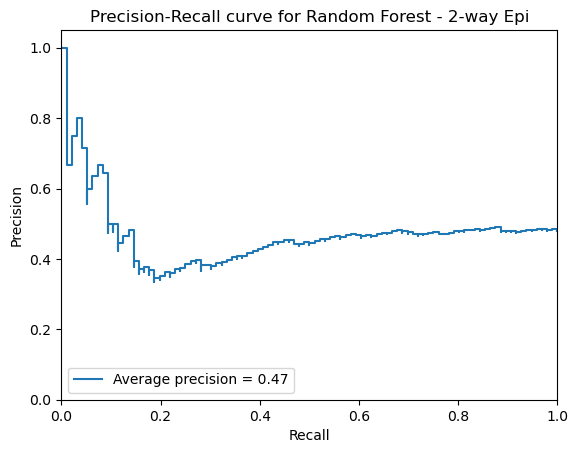

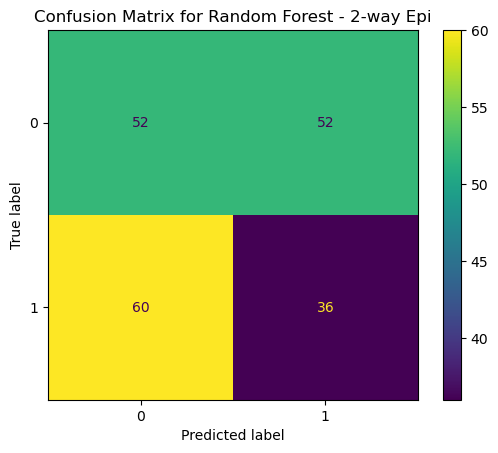

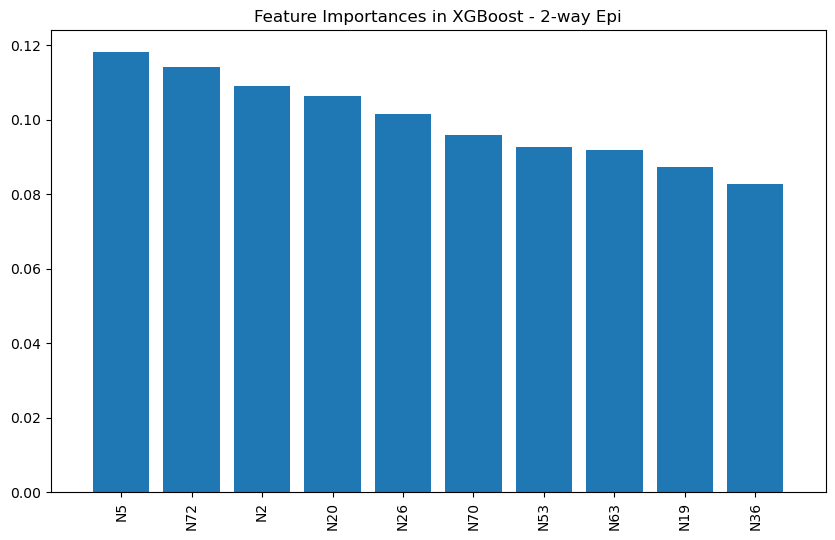

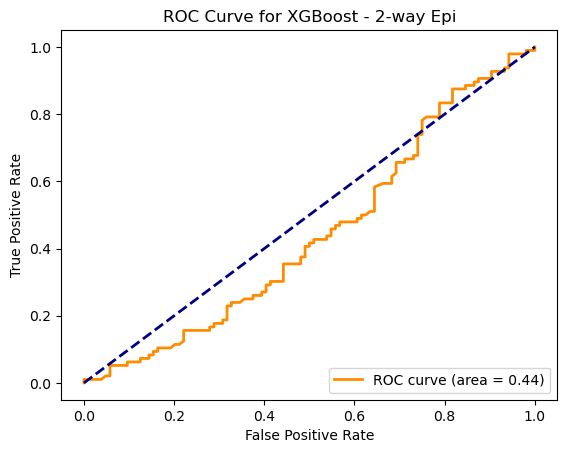

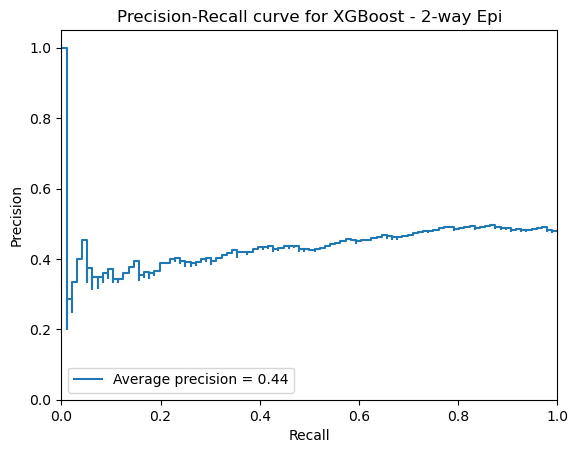

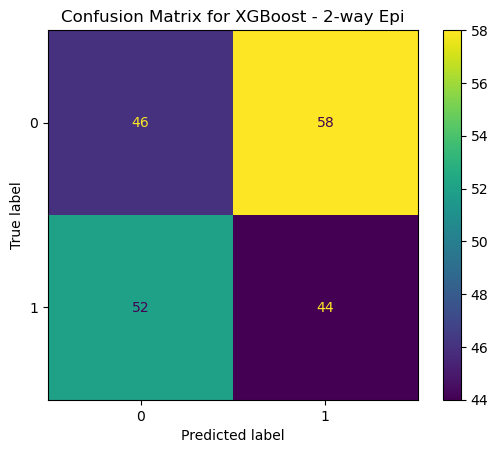

Processing 2Additive 2-way Epi...


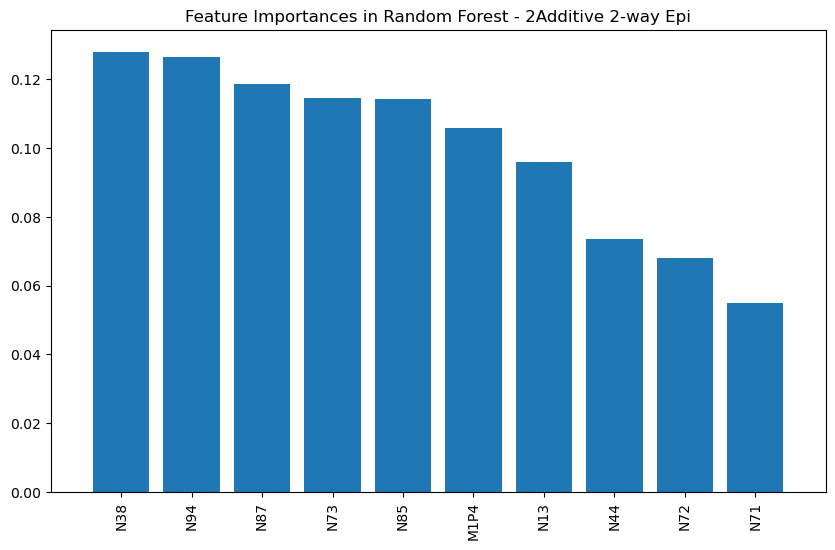

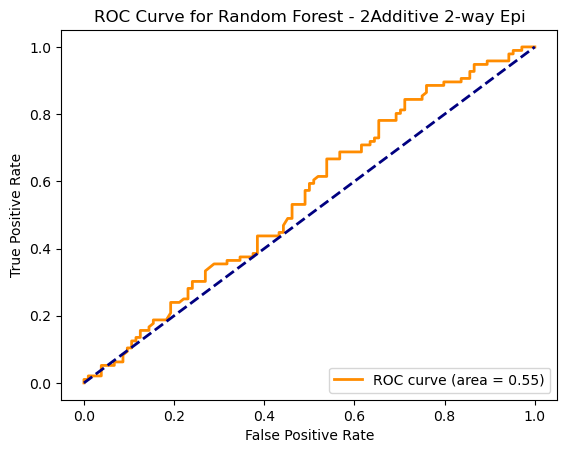

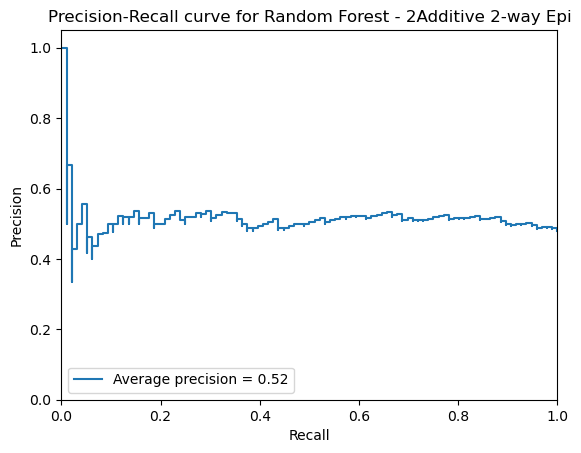

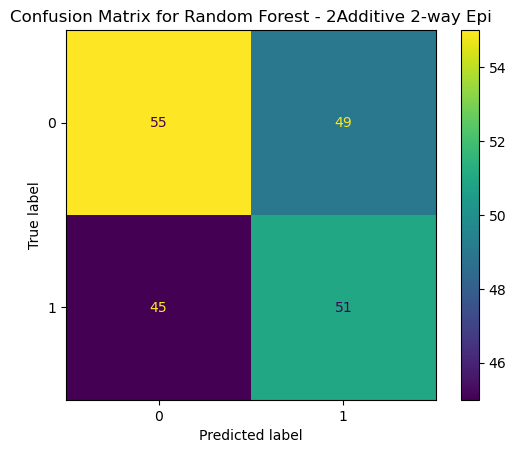

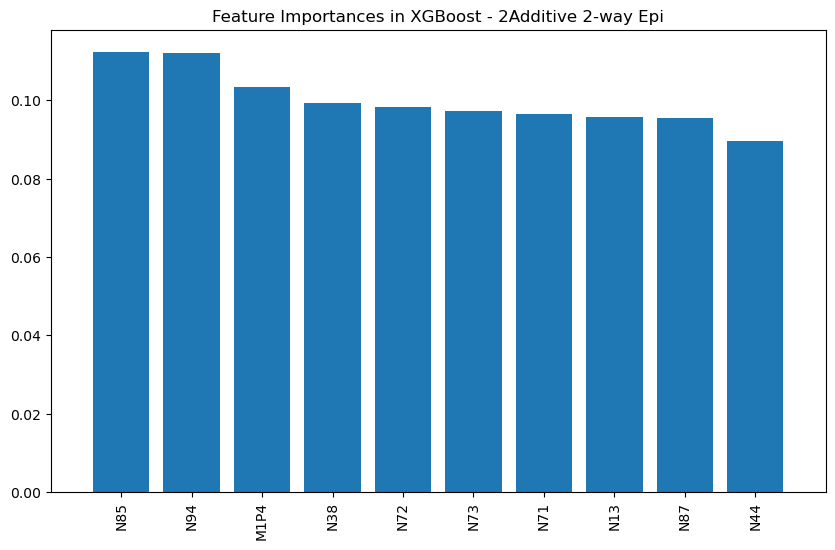

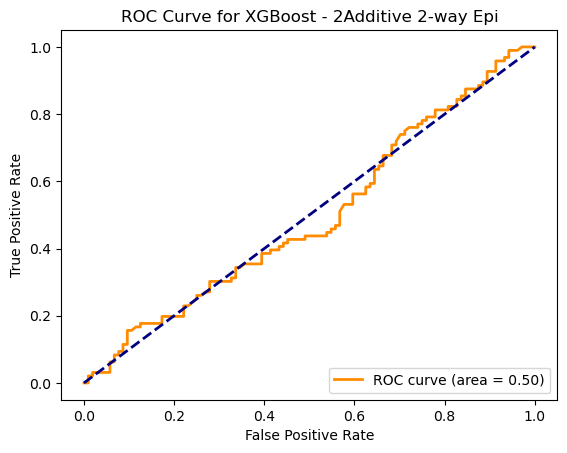

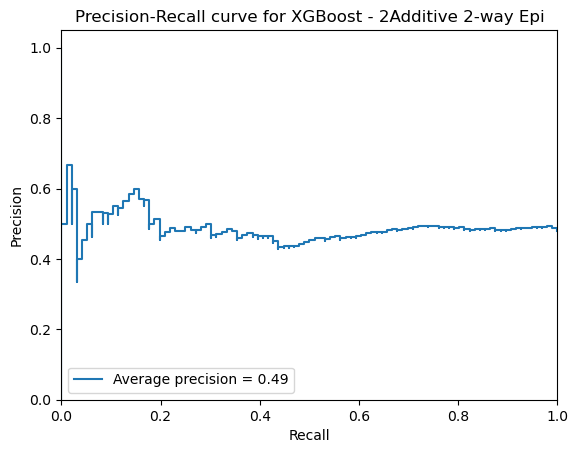

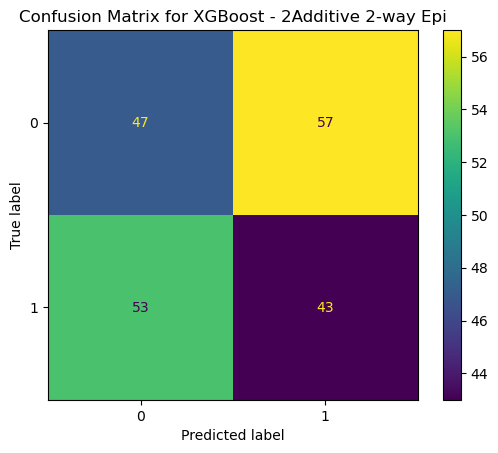

Processing 4-way Additive...


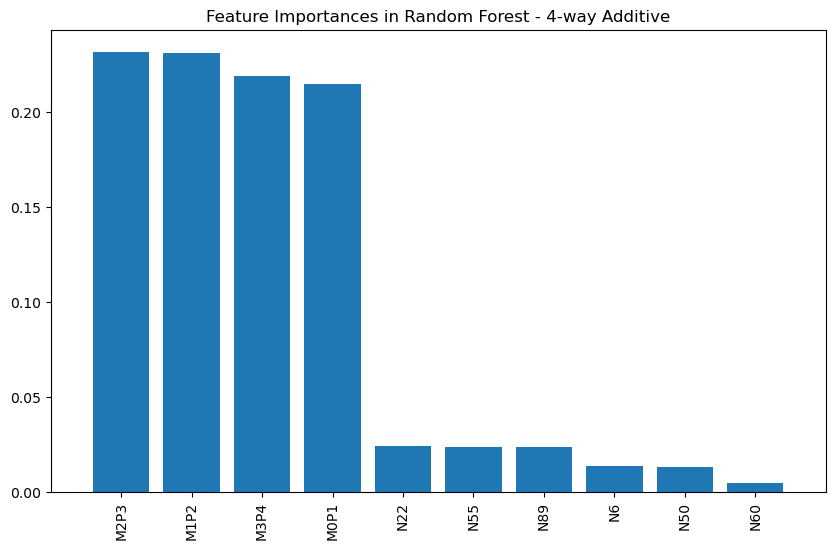

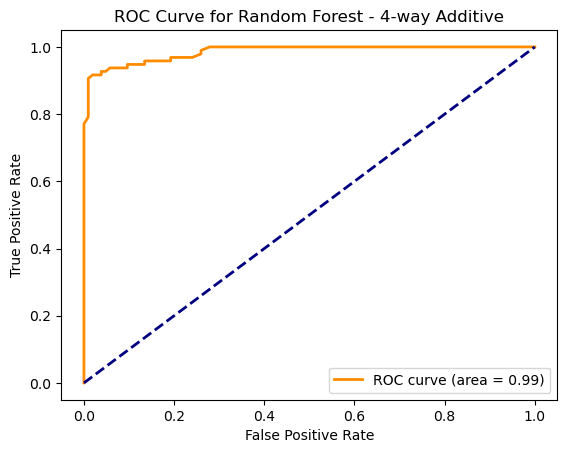

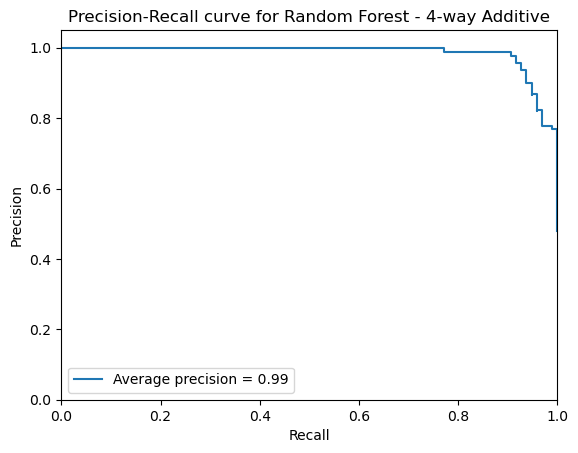

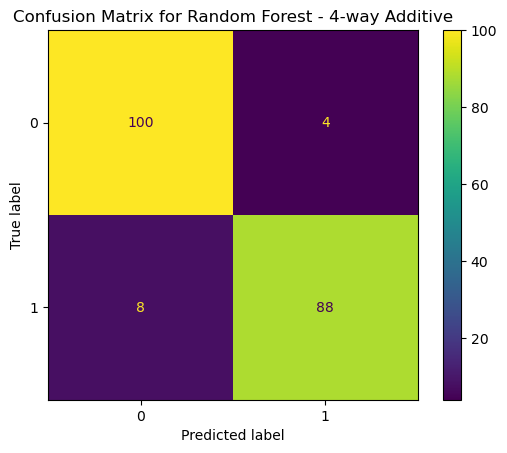

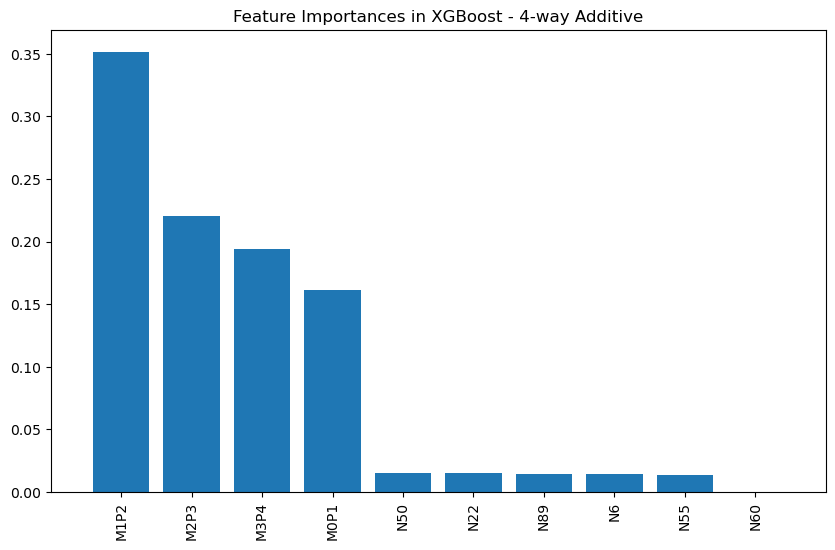

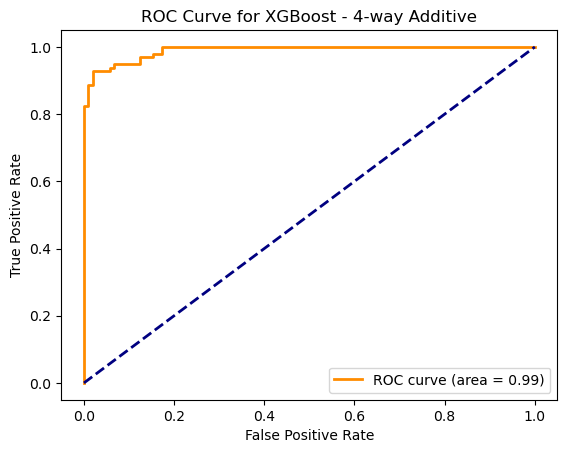

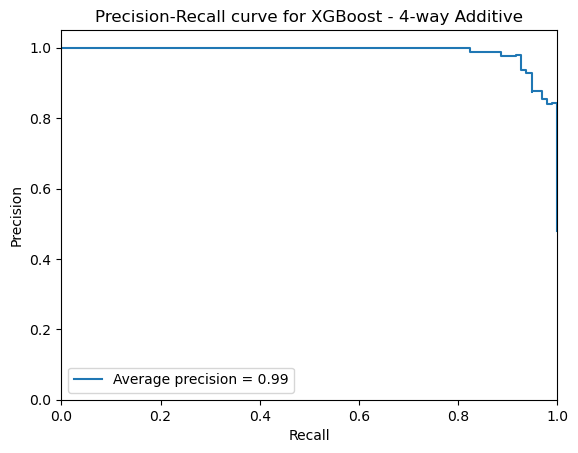

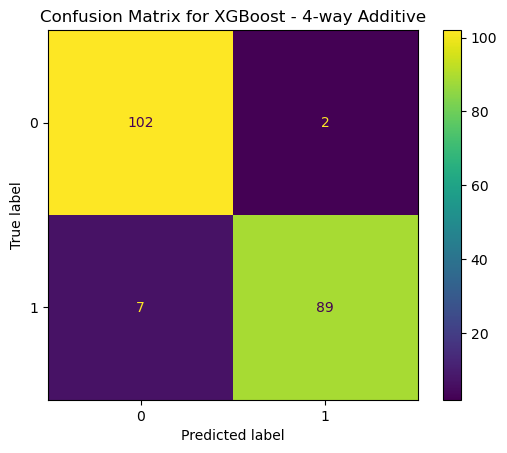

Processing 4-way Heterogeneous...


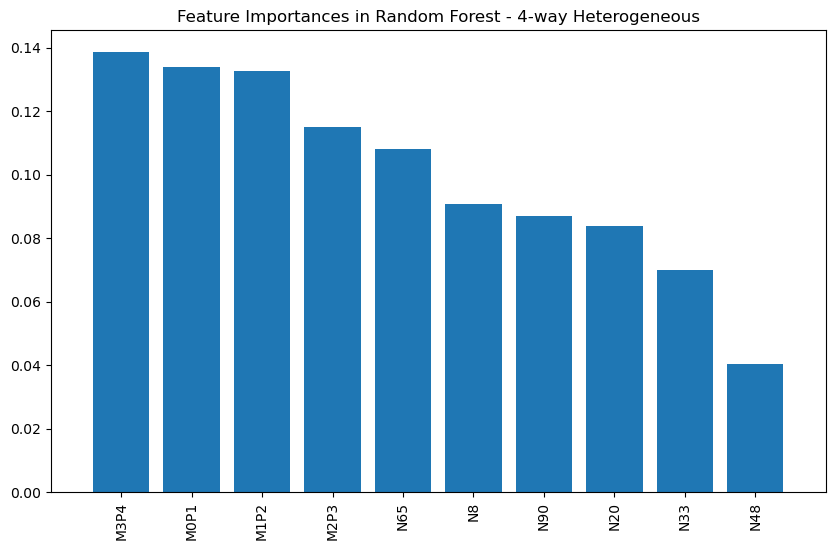

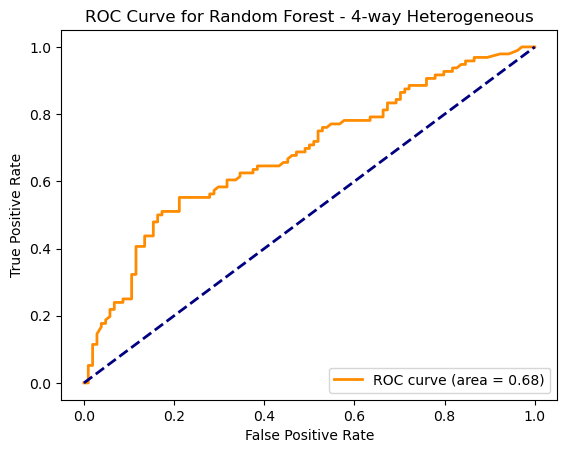

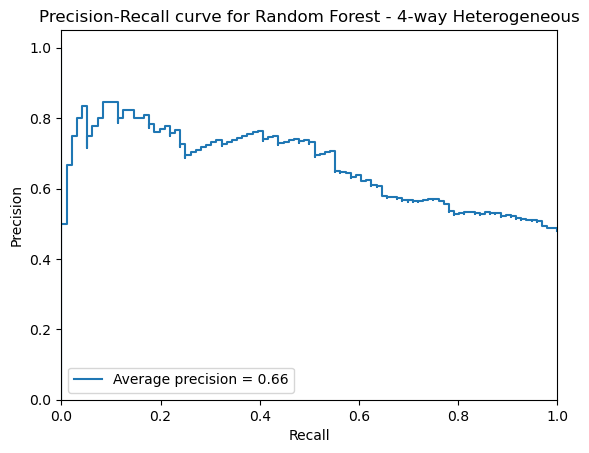

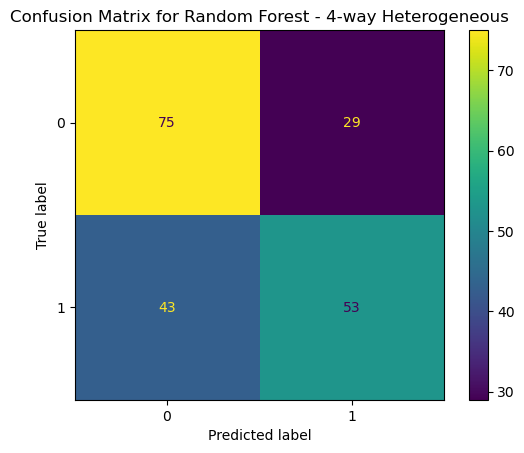

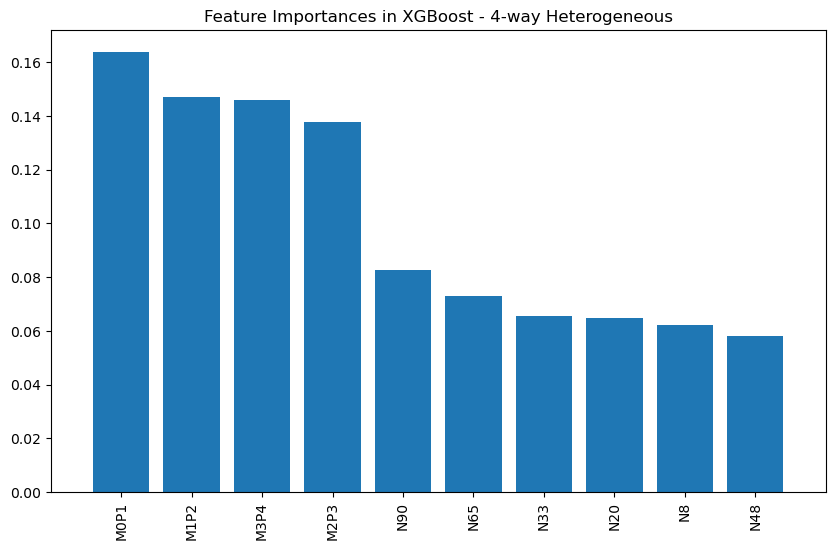

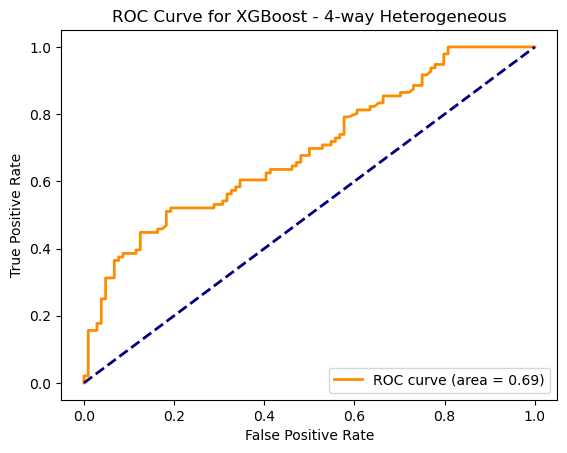

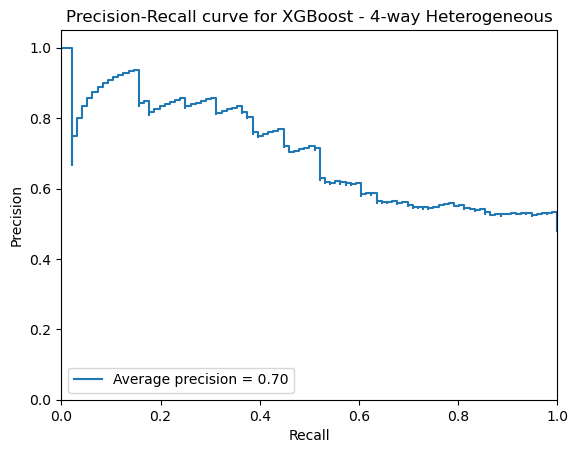

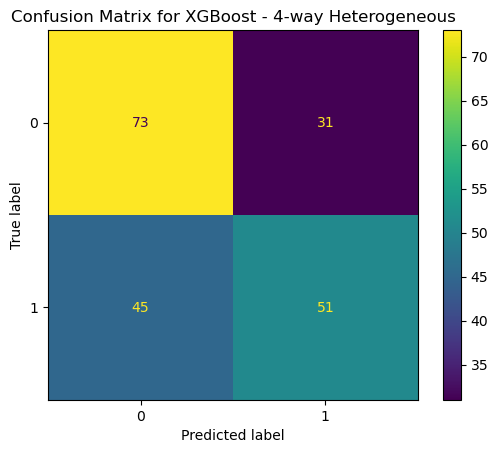

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Function to load and standardize the dataset
def load_and_standardize(path):
    df = pd.read_csv(path, sep="\t")
    X = df.drop('Class', axis=1)
    y = df['Class']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return pd.DataFrame(X_scaled, columns=X.columns), y

# Feature selection functions (assuming they're defined elsewhere)
def select_features_anova(X, y, num_features=10):
    selector = SelectKBest(score_func=f_classif, k=num_features)
    X_selected = selector.fit_transform(X, y)
    return X_selected, selector.get_support(indices=True)

# Function to plot feature importances
def plot_feature_importances(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances in {title}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()

# Function to plot ROC and Precision-Recall curves, and confusion matrix
def plot_evaluation_metrics(y_test, y_probs, y_pred, title):
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {title}')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    average_precision = average_precision_score(y_test, y_probs)
    plt.figure()
    plt.step(recall, precision, where='post', label=f'Average precision = {average_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall curve for {title}')
    plt.legend(loc="lower left")
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {title}')
    plt.show()

# Training and evaluation function
def train_and_evaluate(X, y, feature_indices, dataset_name):
    X_selected = X.iloc[:, feature_indices]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    models = [('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
              ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))]

    for model_name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        probabilities = model.predict_proba(X_test)[:, 1]
        plot_feature_importances(model, X.columns[feature_indices], f"{model_name} - {dataset_name}")
        plot_evaluation_metrics(y_test, probabilities, predictions, f"{model_name} - {dataset_name}")

# Dictionary of dataset names and their paths
datasets = {
    "2-way Epi": '2-wayEpi_100feat.txt',
    "2Additive 2-way Epi": '2Additive_2-wayEpi_100feat.txt',
    "4-way Additive": '4-wayAdditive_100feat.txt',
    "4-way Heterogeneous": '4-wayHeterogeneous_100feat.txt'
}

# Function to process each dataset
def process_all_datasets(datasets):
    for dataset_name, path in datasets.items():
        print(f"Processing {dataset_name}...")
        X, y = load_and_standardize(path)
        _, indices_anova = select_features_anova(X, y, num_features=10)
        train_and_evaluate(X, y, indices_anova, dataset_name)

# Process all datasets
process_all_datasets(datasets)

